##### Generating Linspace, hence we got this

In [160]:
import nbconvert
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [13]:
dt= pd.read_csv("C:/Users/USER/OneDrive/Documents/Cancer.csv")

In [16]:
dt1= dt.drop(["id"],axis=1).copy()

In [17]:
dt1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


####  Descriptive Statistics

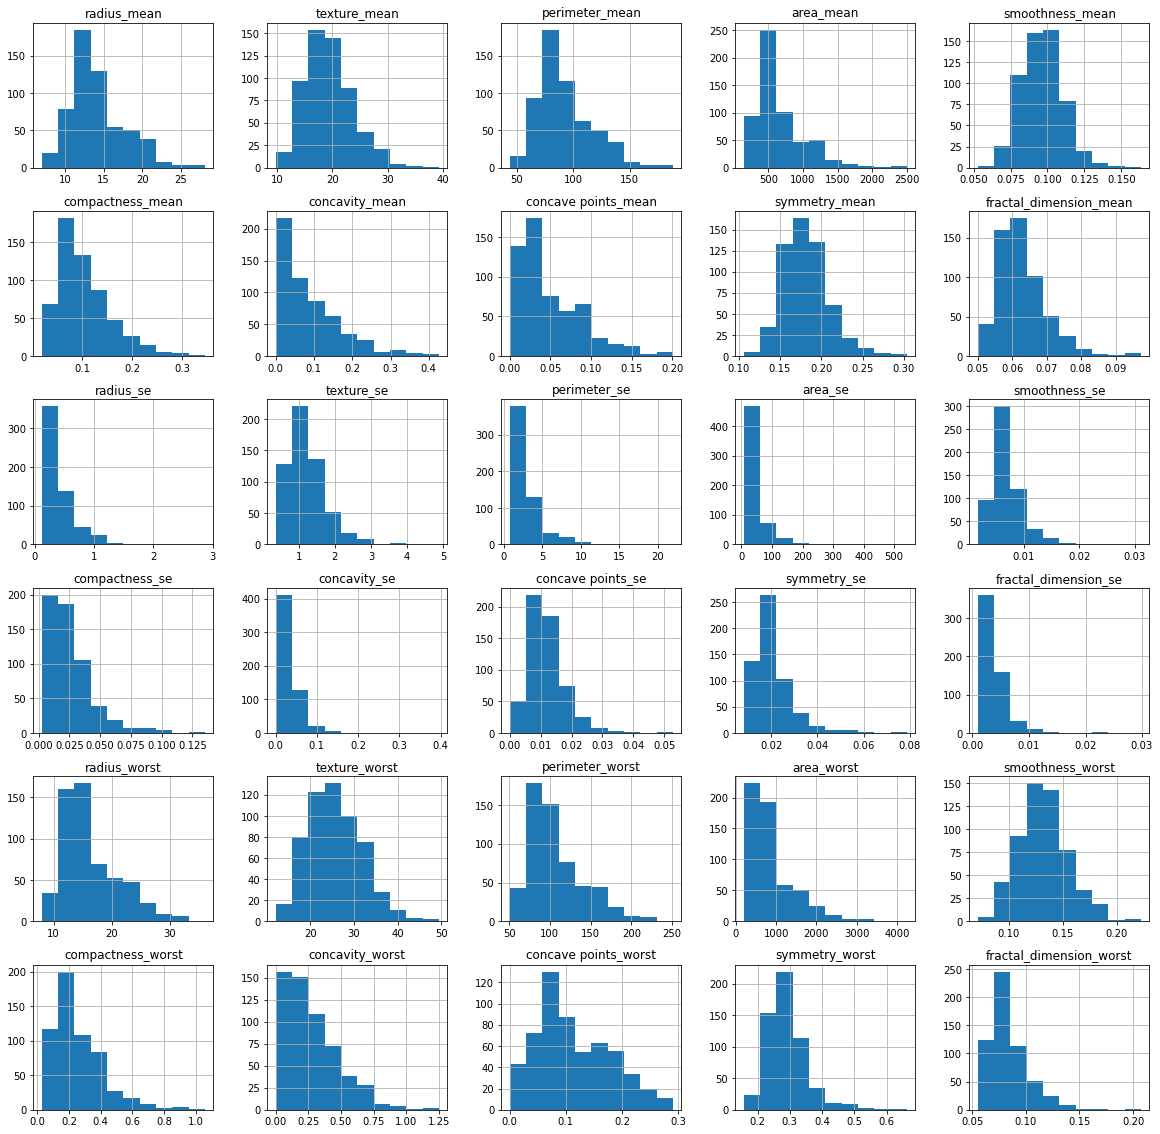

In [21]:
dt1.hist(figsize=(20,20))
plt.show()

#### Observations

Most of these variables are skewed to the right, hence data transformation will be required

#### Correlation


In [23]:
dt2 = dt1.copy()
dt2['Target'] = dt2['diagnosis'].apply(
    lambda x: 0 if x == 'M' else 1)

In [30]:
correlations = dt2.corr()['Target'].sort_values()
print("Correlations\n", correlations) 

Correlations
 concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se    

In [42]:
cor_new = dt2.corr()

In [44]:
mk = np.zeros_like(cor_new)

In [45]:
mk = np.zeros_like(cor_new)
mk[np.triu_indices_from(mask)] = True

<AxesSubplot:>

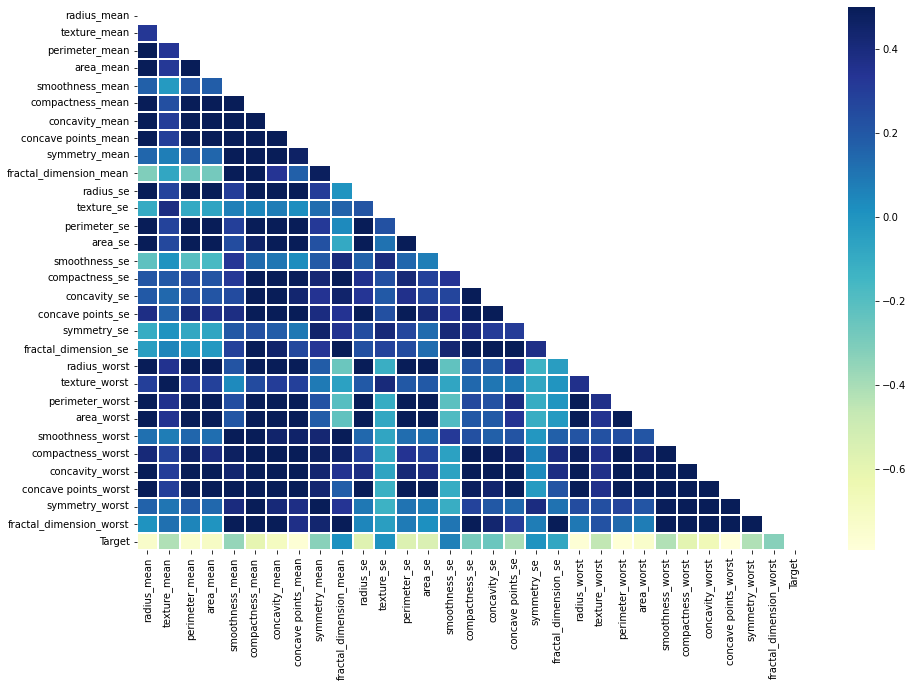

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(cor_new,
            vmax=.5,
            mask=mk,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

### Observations

Variables such as fractal_dimension_se, symmetry_se , texture_se , fractal_dimension_mean and smoothness_se have a very low positive relationship with our target variable, hence we have to remove them from the data set.

In [134]:
# Train Test Split

X = dt2.drop(['diagnosis', 'Target'],axis=1)
y = dt2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [136]:
# Grid Search for Random Forest
import warnings
with warnings.catch_warnings(record=True):
    rf=RandomForestClassifier(random_state=101)
    param_grid={'n_estimators':[64,100,128,200], 'max_features':[2,3,4],'bootstrap':[True,False], 'oob_score':[True,False]}
    Random_Forest_Grid=GridSearchCV(rf, param_grid)
    Random_Forest_Grid.fit(X_train, y_train)

In [137]:
Grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64, 'oob_score': True}

In [138]:
### Grid Search for Decision Tree

dtree= DecisionTreeClassifier(random_state=101)

params =  {
    'min_samples_split': [2, 3, 4,5],
    'max_depth': [3,6,9,12,15, None]
}
decisiontree_grid= GridSearchCV(estimator=dtree,
                    param_grid=params,
                    cv=10,
                    n_jobs=1)

decisiontree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=1,
             param_grid={'max_depth': [3, 6, 9, 12, 15, None],
                         'min_samples_split': [2, 3, 4, 5]})

In [139]:
decisiontree_grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
### Grid Search for Gradient Boosting Classifier

In [140]:
param_gb={'n_estimators':[50,100,150], 'learning_rate':[0.05,0.1,0.15,0.2],'max_depth':[3,4,5]}
GB=GradientBoostingClassifier(random_state=101)
GB_Grid=GridSearchCV(GB, param_gb)
GB_Grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [141]:
GB_Grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [142]:
## Fitting the random Forest model using the grid parameters

randomFt= RandomForestClassifier(max_features= 4, n_estimators=64, random_state=101, bootstrap=True,oob_score=True)
randomFt.fit(X_train,y_train)

### Fitting the Decision Tree model using the grid parameters
dTree= DecisionTreeClassifier(max_depth=3, min_samples_split=2,random_state=101)
dTree.fit(X_train,y_train)

### Fitting the gradient boosting model using the grid parameters
GB=GradientBoostingClassifier(random_state=101,learning_rate= 0.05, max_depth=3, n_estimators=100)
GB.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=101)

In [143]:

#making Predictions
predRand= randomFt.predict(X_test)
predTree=dTree.predict(X_test)
predGB=GB.predict(X_test)

In [144]:
# Model Performance for Random Forest
print(classification_report(y_test, predRand))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96       105
           M       0.94      0.94      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [145]:
# Model Performance for Decision Tree
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           B       0.94      0.97      0.95       105
           M       0.95      0.89      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [146]:
# Model Performance for Decision Tree
print(classification_report(y_test, predGB))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96       105
           M       0.94      0.94      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Observations

Gradient Boosting Classifier appears to be perfect for our data. Let's examine the important features in the Gradient Boosting Classifier

In [147]:
I_features=GB.feature_importances_

In [148]:
Important_features= pd.DataFrame(index=X.columns, data=I_features, columns=['Important_Features'])

In [149]:
Important_features

,Important_Features
radius_mean,0.000450
texture_mean,0.015867
perimeter_mean,0.000420
area_mean,0.000594
smoothness_mean,0.000021
compactness_mean,0.002901
concavity_mean,0.000313
concave points_mean,0.219590
symmetry_mean,0.000410
fractal_dimension_mean,0.000320


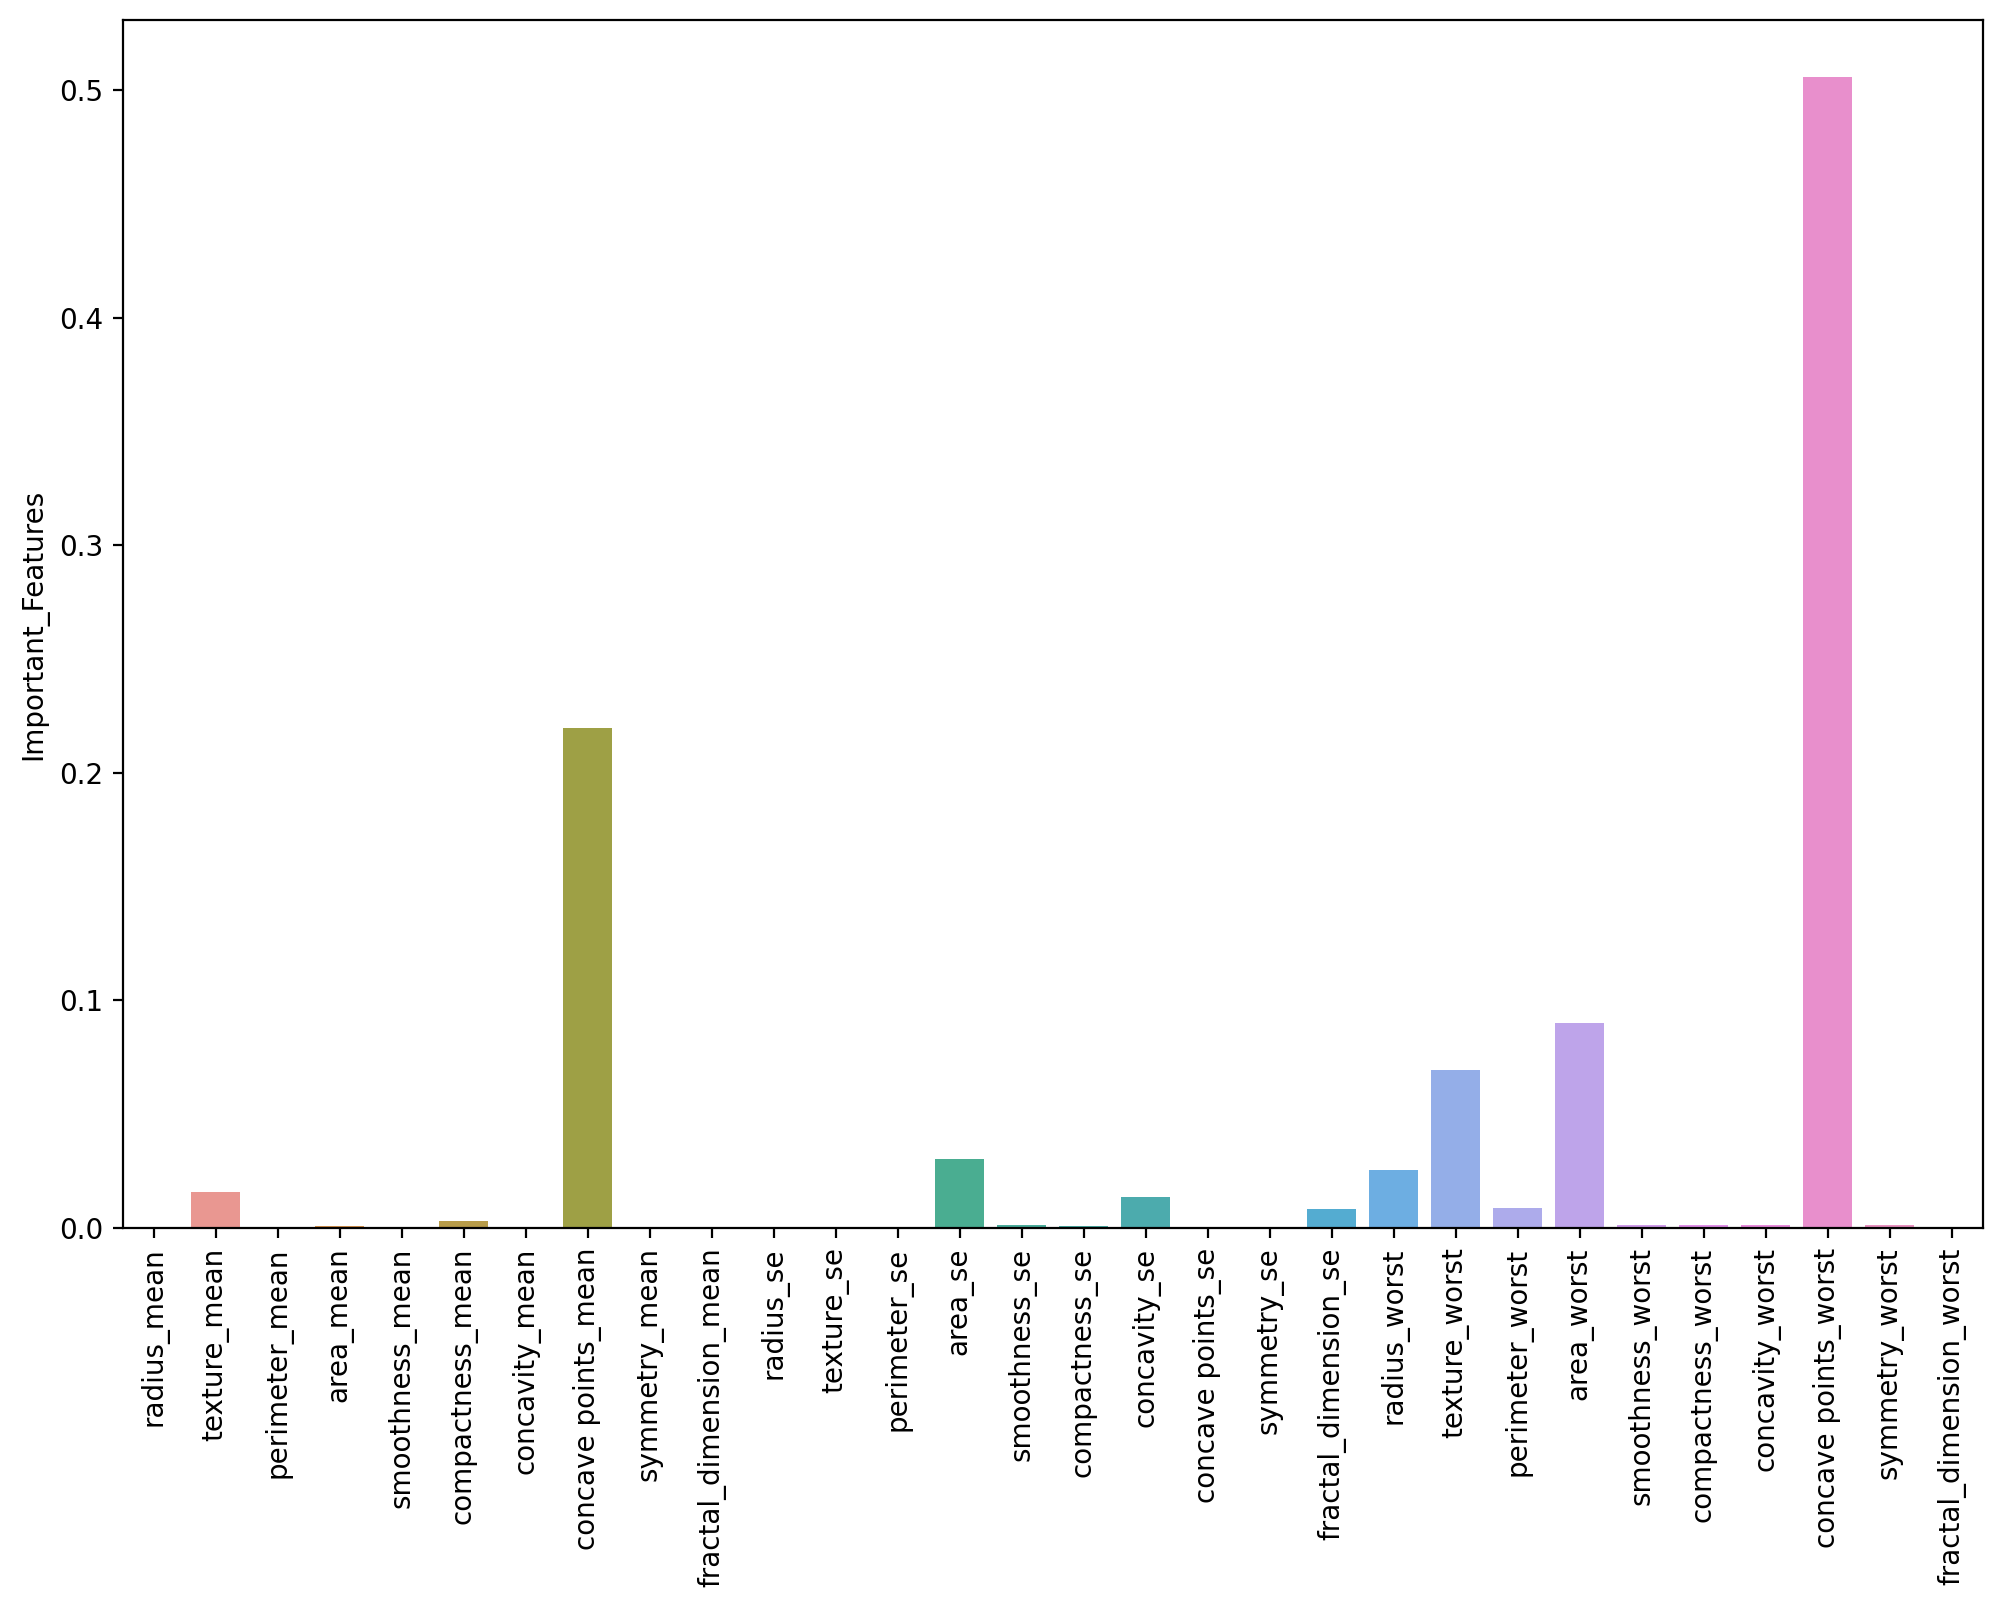

In [151]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=Important_features, x=Important_features.index, y="Important_Features")
plt.xticks(rotation=90);

### Observations

As we can see , the most important features in the Gradient boosting model are texture_mean, Concave points_worst, area_worst, perimeter_worst, texture_worst, radius_worst, fractal_dimension_se, concavity_se, area_se, concave points_mean, Compactness_mean and texture_mean

In [ ]:
### Saving our model future usage

In [153]:
import joblib

In [154]:
joblib.dump(GB, "gradient_final.pkl")

['gradient_final.pkl']